# Datascientist_selary_analysis
The data is downloaded from kaggle(https://www.kaggle.com/kaggle/kaggle-survey-2017), our purpose is to analysis the salary of Datascientist around world.

## Dispose of the data
The original data is contain 16716 respondents from about 52 countrys. However, some important information is absent for some of data, we need to select a part of it to achieve our purpose.

**Import some necessary tools for data pre-processing and load the data to pandas including exchange rate of different currency to USD.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

data = pd.read_csv("kaggle_job_datascientist_2017/multipleChoiceResponses.csv", encoding = "ISO-8859-1")
chang_rate = pd.read_csv("kaggle_job_datascientist_2017/conversionRates.csv", encoding = "ISO-8859-1")

**Combine with this to dataframe and select the features we needed.**

In [2]:
data_merged = pd.merge(data,chang_rate, how = 'left',left_on='CompensationCurrency', right_on='originCountry' )
data_usefull = data_merged[['GenderSelect','Country', 'Age','EmploymentStatus','CodeWriter',
             'CurrentJobTitleSelect', 'CurrentEmployerType', 'LanguageRecommendationSelect',
             'FormalEducation', 'CompensationAmount', 'CompensationCurrency', 'exchangeRate']]

**Select the data with full-time job and delete the data without the information of Countray or salay.**

In [3]:
data_selected = data_usefull[data_usefull['EmploymentStatus']=='Employed full-time']
data_selected = data_selected.dropna(axis=0, how = 'any', subset=['Country', 'CompensationAmount','exchangeRate'])

**Change the string to float and exchange all salary into USD.**

In [4]:
data_selected['CompensationAmount'] = data_selected['CompensationAmount'].apply(lambda x: x.replace(',',''))
data_selected.drop(data_selected[data_selected['CompensationAmount']=='-'].index,inplace=True)
data_selected['CompensationAmountExanged'] = data_selected.apply(lambda x : float(x['CompensationAmount'])*float(x['exchangeRate']),  axis=1)

**Replace the other name of China into "Chian" especially including “Taiwan”.**

In [5]:
data_selected.replace({"People 's Republic of China":'China' , "Republic of China":'China', "Taiwan":'China'}, inplace = True)

**Save data.**

In [6]:
data_selected.to_csv('kaggle_job_datascientist_2017/data_selected.csv')

**Show some basic Information**

In [7]:
data_selected.head()

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,CurrentEmployerType,LanguageRecommendationSelect,FormalEducation,CompensationAmount,CompensationCurrency,exchangeRate,CompensationAmountExanged
8,Female,Australia,43.0,Employed full-time,Yes,Business Analyst,Employed by non-profit or NGO,Python,Bachelor's degree,80000,AUD,0.802310,64184.8
9,Male,Russia,33.0,Employed full-time,Yes,Software Developer/Software Engineer,Employed by a company that doesn't perform adv...,Python,Bachelor's degree,1200000,RUB,0.017402,20882.4
11,Male,India,27.0,Employed full-time,Yes,Data Scientist,Employed by professional services/consulting f...,Python,Bachelor's degree,95000,INR,0.015620,1483.9
14,Male,China,26.0,Employed full-time,Yes,Software Developer/Software Engineer,Employed by professional services/consulting firm,Python,Master's degree,1100000,TWD,0.033304,36634.4
22,Male,United States,33.0,Employed full-time,Yes,Scientist/Researcher,Employed by professional services/consulting firm,Matlab,Doctoral degree,100000,USD,1.000000,100000.0


In [8]:
print('The total number of respondents:',data_selected.shape[0])
print('Total number of Countries with respondents:',data_selected['Country'].nunique())
print('Country with highest respondents:',data_selected['Country'].value_counts().index[0],'with',data_selected['Country'].value_counts().values[0],'respondents')
print('Youngest respondent:',data_selected['Age'].min(),' and Oldest respondent:',data_selected['Age'].max())

The total number of respondents: 3774
Total number of Countries with respondents: 50
Country with highest respondents: United States with 1098 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


## plot

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#Import Plotly and use it in the Offline Mode
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')

**Gender**

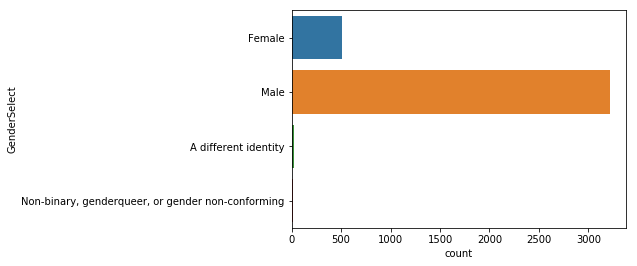

In [10]:
sns.countplot(y='GenderSelect', data=data_selected)
plt.show()

**Country**

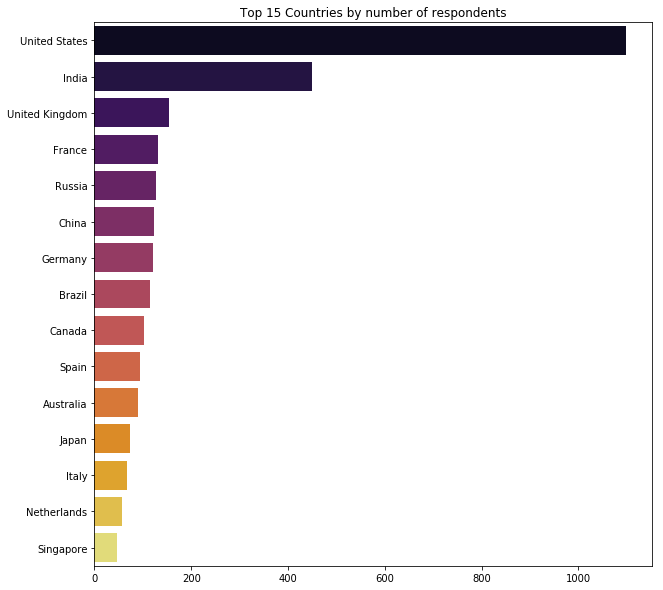

,Country
United States,1098
India,450
United Kingdom,153
France,131
Russia,127
China,124
Germany,122
Brazil,115
Canada,102
Spain,95


In [11]:
data_country = data_selected.drop(data_selected[data_selected['Country']=='Other'].index)['Country'].value_counts().to_frame()
sns.barplot(data_country['Country'][:15],data_country.index[:15],palette='inferno')
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()
data_country[:15]

In [12]:
data = [ dict(
        type = 'choropleth',
        locations = data_country.index,
        locationmode = 'country names',
        z = data_country['Country'],
        text = data_country.index,
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(56, 142, 60)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Survey Respondents'),
      ) ]

layout = dict(
    title = 'Survey Respondents by Nationality',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='survey-world-map')

**Age**

In [13]:
#Plot the Age distribution
fig = fig_fact.create_distplot([data_selected[data_selected['Age'] > 0]['Age']], ['age'], colors=['#BA68C8'])
py.iplot(fig, filename='Basic Distplot')

**Salary**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



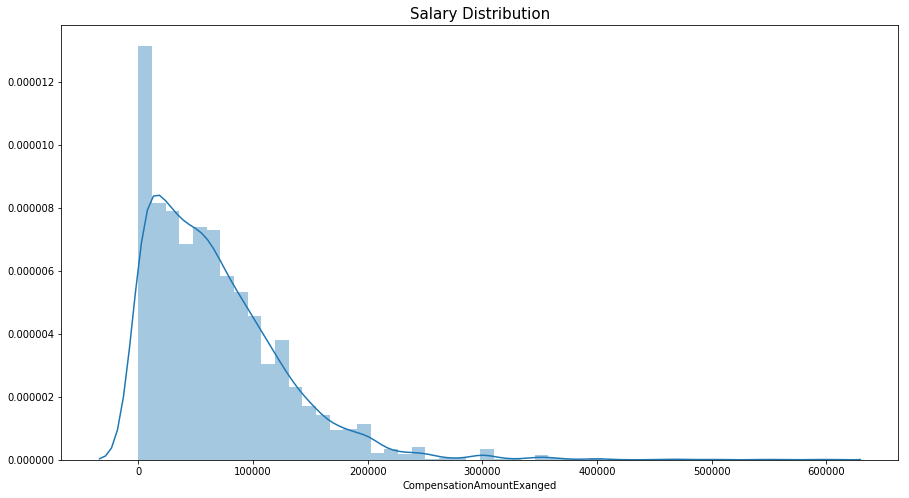

In [14]:
plt.subplots(figsize=(15,8))
data_salary=data_selected[data_selected['CompensationAmountExanged']<1000000]
sns.distplot(data_salary['CompensationAmountExanged'])
plt.title('Salary Distribution',size=15)
plt.show()

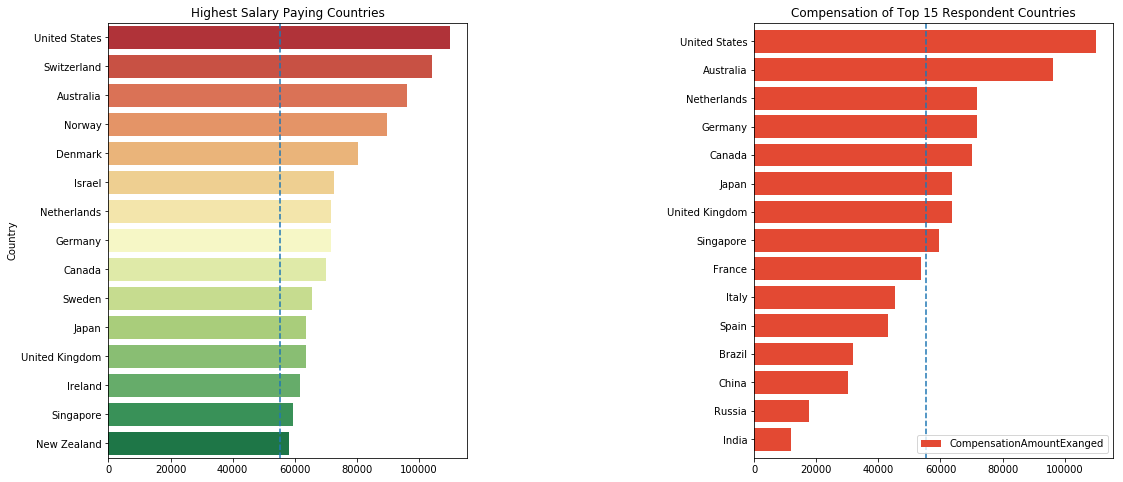

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sal_coun=data_salary.groupby('Country')['CompensationAmountExanged'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('CompensationAmountExanged',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
ax[0].axvline(data_salary['CompensationAmountExanged'].median(),linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')
resp_coun=data_country[:15]
max_coun=data_salary.groupby('Country')['CompensationAmountExanged'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='CompensationAmountExanged',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(data_salary['CompensationAmountExanged'].median(),linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

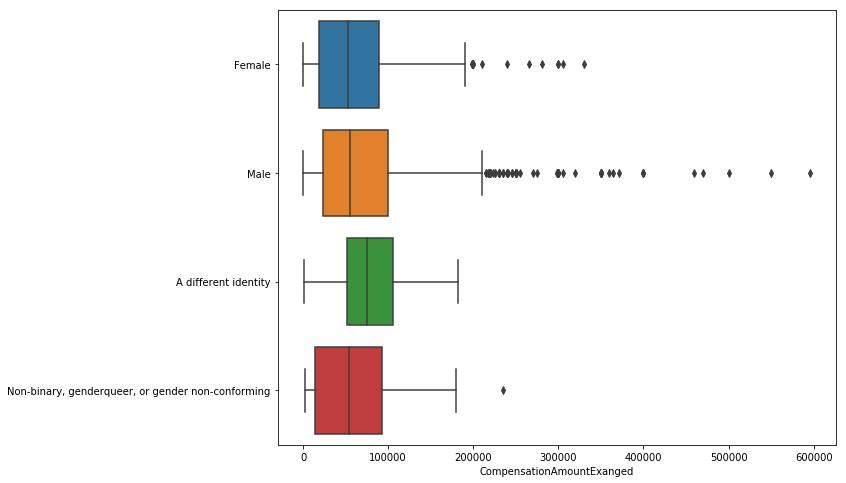

In [16]:
plt.subplots(figsize=(10,8))
sns.boxplot(y='GenderSelect',x='CompensationAmountExanged',data=data_salary)
plt.ylabel('')
plt.show()

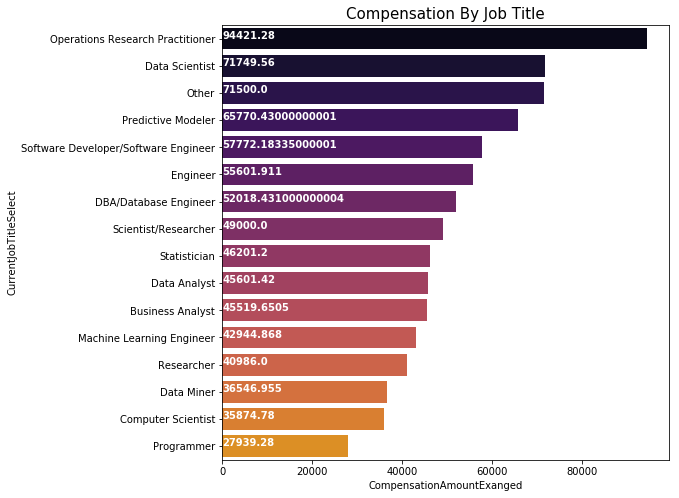

In [17]:
sal_job=data_salary.groupby('CurrentJobTitleSelect')['CompensationAmountExanged'].median().to_frame().sort_values(by='CompensationAmountExanged',ascending=False)
ax=sns.barplot(sal_job.CompensationAmountExanged,sal_job.index,palette=sns.color_palette('inferno',20))
plt.title('Compensation By Job Title',size=15)
for i, v in enumerate(sal_job.CompensationAmountExanged): 
    ax.text(.5, i, v,fontsize=10,color='white',weight='bold')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()


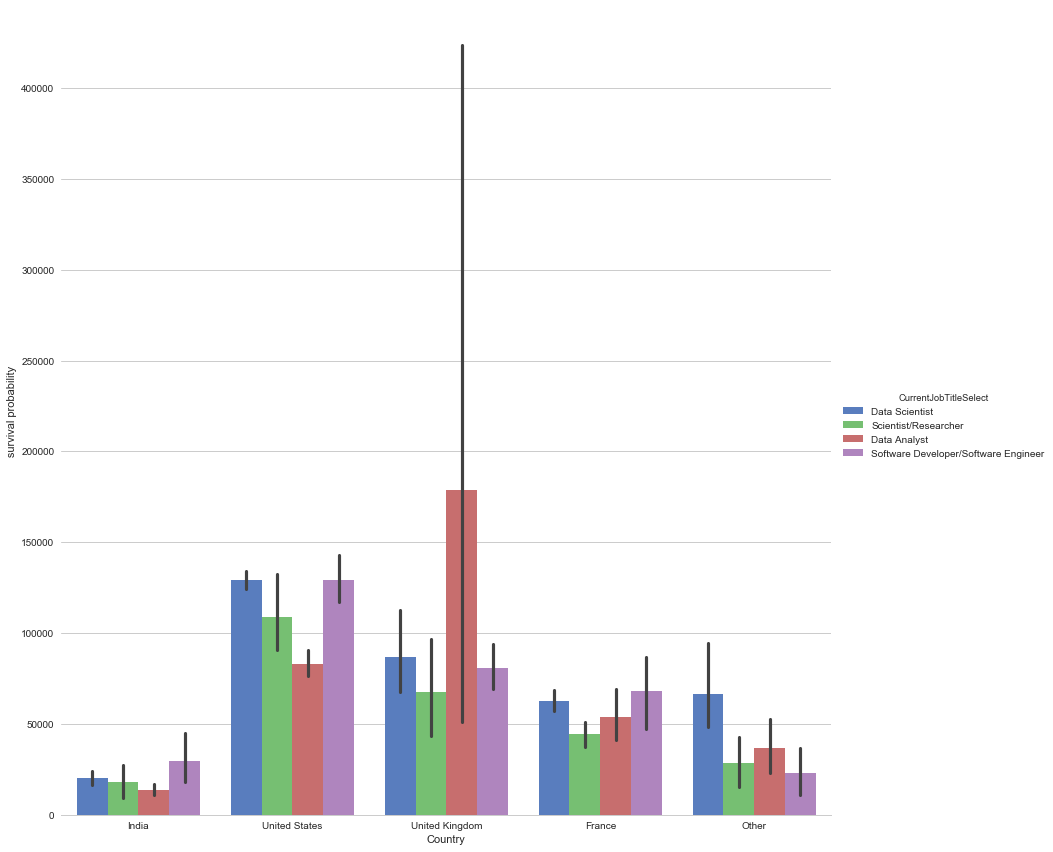

In [18]:
data_plot = data_selected[data_selected['Country'].isin(data_selected['Country'].value_counts().index[0:5].tolist())]
data_plot = data_plot[data_plot['CurrentJobTitleSelect'].isin(data_plot['CurrentJobTitleSelect'].value_counts().index[0:4].tolist())]
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="Country", y="CompensationAmountExanged", hue="CurrentJobTitleSelect", data=data_plot,
                size=12, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")
plt.show()

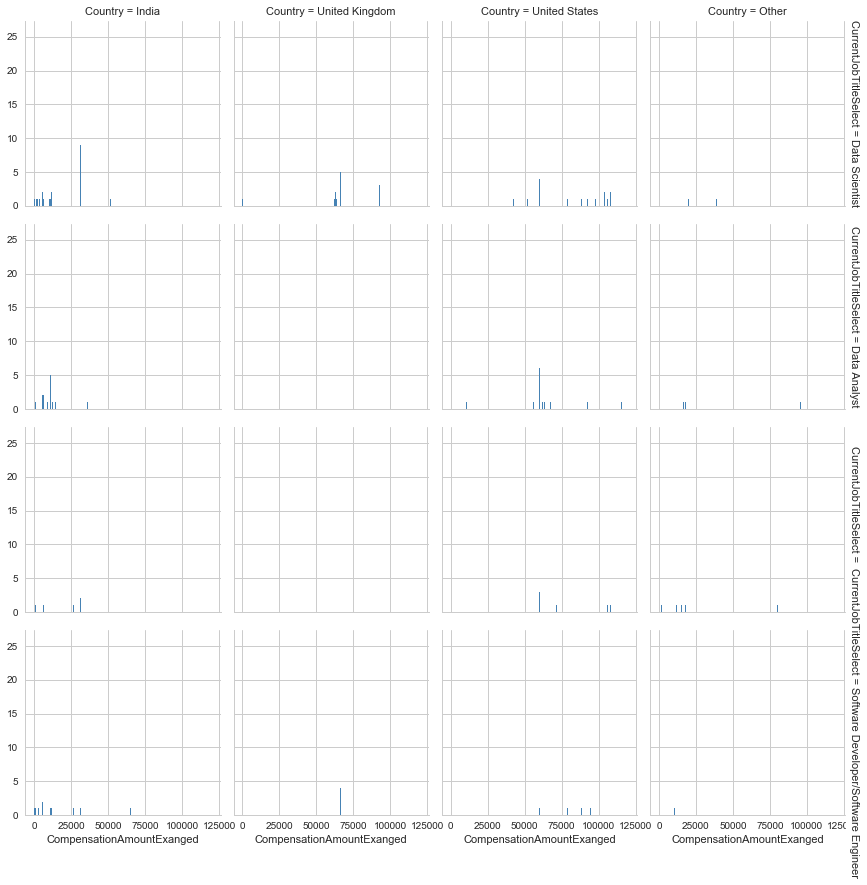

In [19]:
data_plot = data_selected[data_selected['Country'].isin(data_selected['Country'].value_counts().index[0:4].tolist())]
data_plot = data_plot[data_plot['CurrentJobTitleSelect'].isin(data_plot['CurrentJobTitleSelect'].value_counts().index[0:4].tolist())]
g = sns.FacetGrid(data_plot, row="CurrentJobTitleSelect", col="Country", margin_titles=True)
bins = np.linspace(0, 120000, 1000)
g.map(plt.hist, "CompensationAmountExanged", color="steelblue", bins=bins)
plt.show()

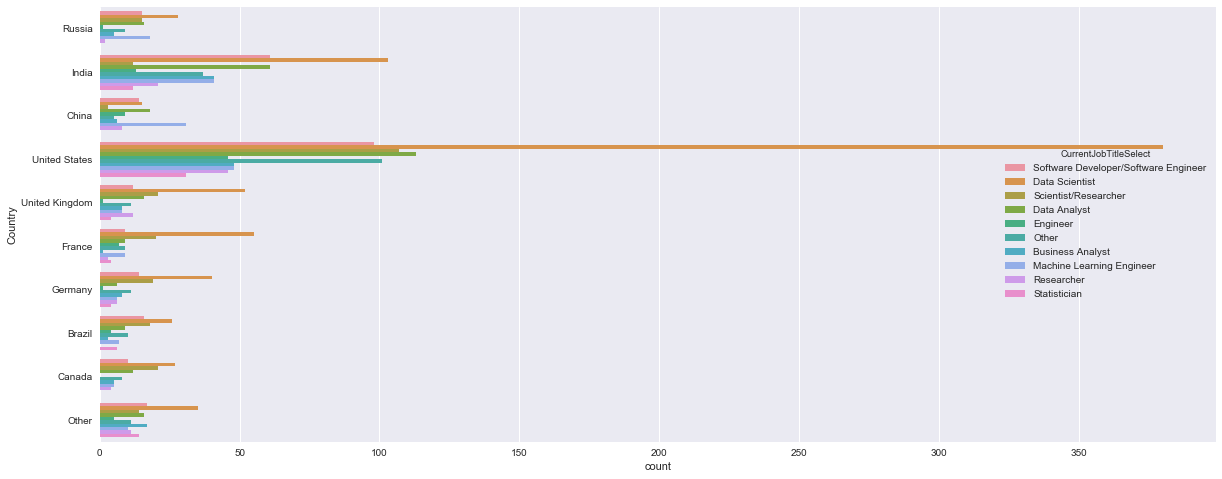

In [20]:
data_plot = data_selected[data_selected['Country'].isin(data_selected['Country'].value_counts().index[0:10].tolist())]
data_plot = data_plot[data_plot['CurrentJobTitleSelect'].isin(data_plot['CurrentJobTitleSelect'].value_counts().index[0:10].tolist())]
fig = plt.figure(figsize=(20, 8))
sns.set(style="darkgrid")
ax = sns.countplot(y="Country",  hue="CurrentJobTitleSelect",  data=data_plot)
plt.show()

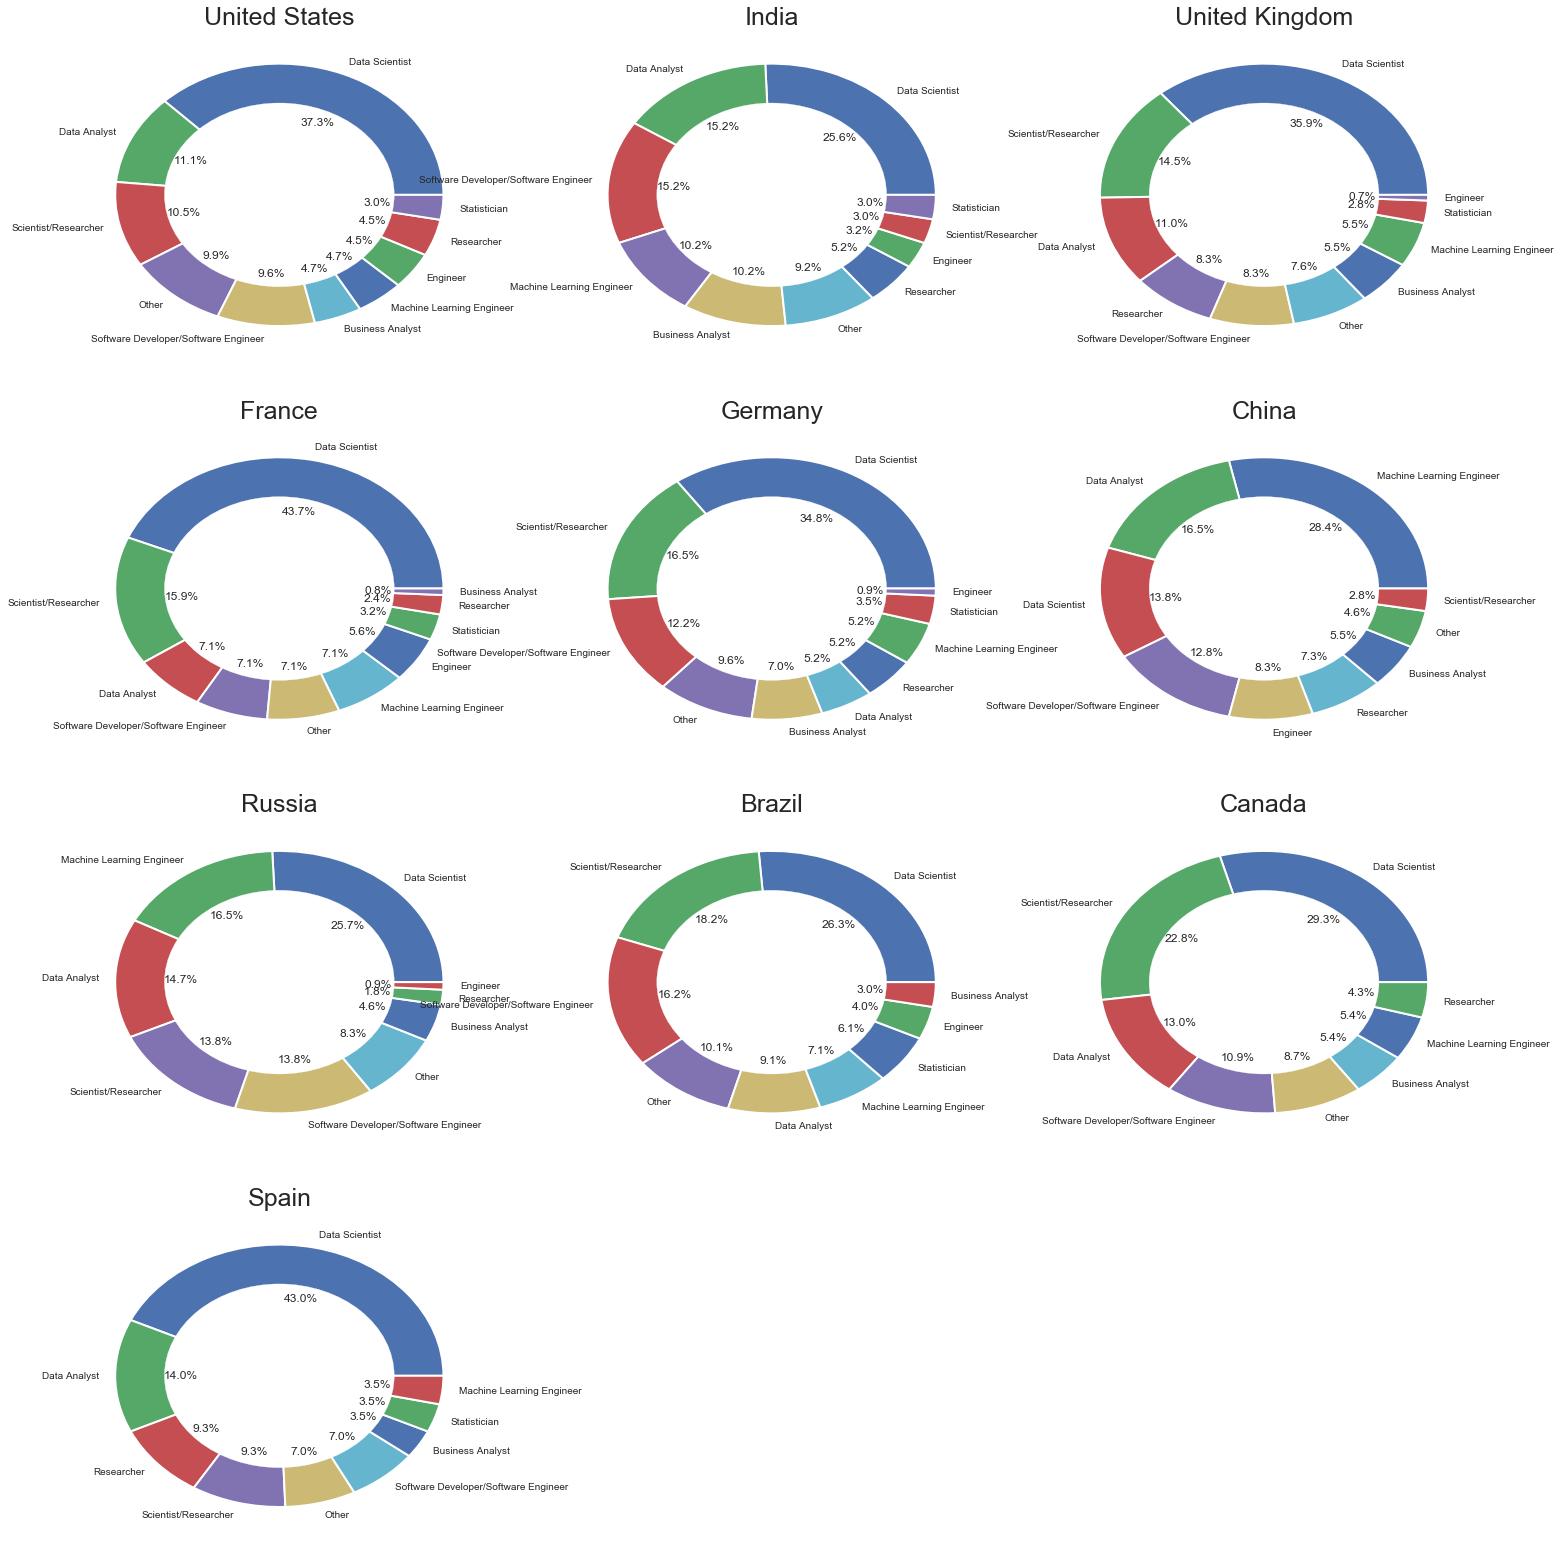

In [59]:
import itertools
data_plot = data_selected[data_selected['Country'].isin(data_selected['Country'].value_counts().index[0:10].tolist())]
data_plot = data_plot[data_plot['CurrentJobTitleSelect'].isin(data_plot['CurrentJobTitleSelect'].value_counts().index[0:10].tolist())]
plt.subplots(figsize=(25,35))
useful = data_plot['Country'].value_counts().index.tolist()
length=len(data_plot['Country'].value_counts())
for i,j in itertools.zip_longest(useful,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    data_plot[data_plot['Country'] == i]['CurrentJobTitleSelect'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
    plt.title(i,size=25)
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

*Refrence*
1. https://www.kaggle.com/rounakbanik/data-science-faq
2. https://www.kaggle.com/ash316/novice-to-grandmaster
3. https://www.kaggle.com/hakkisimsek/plotly-tutorial-1

## test

In [21]:
data_selected.drop(data_selected[data_selected['Country']=='Other'].index,inplace=True)
data_selected['Country'].value_counts(), data_selected.shape

(United States     1098
 India              450
 United Kingdom     153
 France             131
 Russia             127
 China              124
 Germany            122
 Brazil             115
 Canada             102
 Spain               95
 Australia           90
 Japan               74
 Italy               67
 Netherlands         56
 Singapore           46
 South Africa        46
 Poland              43
 Mexico              41
 Ukraine             37
 Switzerland         36
 Colombia            36
 Belgium             31
 Turkey              28
 Israel              28
 Pakistan            28
 Ireland             27
 Finland             26
 Argentina           24
 Denmark             23
 Sweden              23
 Indonesia           22
 Portugal            21
 Philippines         21
 South Korea         21
 Greece              20
 Norway              17
 Nigeria             17
 Hungary             16
 Chile               15
 New Zealand         15
 Malaysia            15
 Hong Kong      

## model

```python
df.dropna(axis=0, how='any', inplace=True)
```
axis：0-行操作（默认），1-列操作 
how：any-只要有空值就删除（默认），all-全部为空值才删除 
inplace：False-返回新的数据集（默认），True-在愿数据集上操作

In [22]:
import pandas as pd

# 删除含有空数据的全部行
df4 = pd.read_csv('4.csv',  encoding='utf-8')
df4 = df4.dropna()

# 可以通过axis参数来删除含有空数据的全部列
df4 = df4.dropna(axis=1)

# 可以通过subset参数来删除在age和sex中含有空数据的全部行
df4 = df4.dropna(subset=["age", "sex"])
print(df4)
df4 = df4.dropna(subset=['age', 'body','home.dest'])

FileNotFoundError: File b'4.csv' does not exist

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sal_coun=data_salary.groupby('Country')['CompensationAmountExanged'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('CompensationAmountExanged',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
# ax[0].axvline(data_salary['CompensationAmountExanged'].median(),linestyle='dashed')
# ax[0].set_title('Highest Salary Paying Countries')
# ax[0].set_xlabel('')
resp_coun=data_country[:15]
max_coun=data_salary.groupby('Country')['CompensationAmountExanged'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='CompensationAmountExanged',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
# ax[1].axvline(data_salary['CompensationAmountExanged'].median(),linestyle='dashed')
# ax[1].set_title('Compensation of Top 15 Respondent Countries')
# ax[1].set_xlabel('')
# ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

In [ ]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
plt.show()

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)
plt.show()

[[-0.4  0. ]
 [ 0.4 96. ]]
[[  0.6   0. ]
 [  1.4 198. ]]
[[  1.6   0. ]
 [  2.4 464. ]]
[[  2.6   0. ]
 [  3.4 723. ]]
[[  3.6   0. ]
 [  4.4 937. ]]
[[  4.6   0. ]
 [  5.4 998. ]]
[[  5.6   0. ]
 [  6.4 769. ]]
[[  6.6   0. ]
 [  7.4 445. ]]
[[  7.6   0. ]
 [  8.4 221. ]]
[[ 8.6  0. ]
 [ 9.4 97. ]]


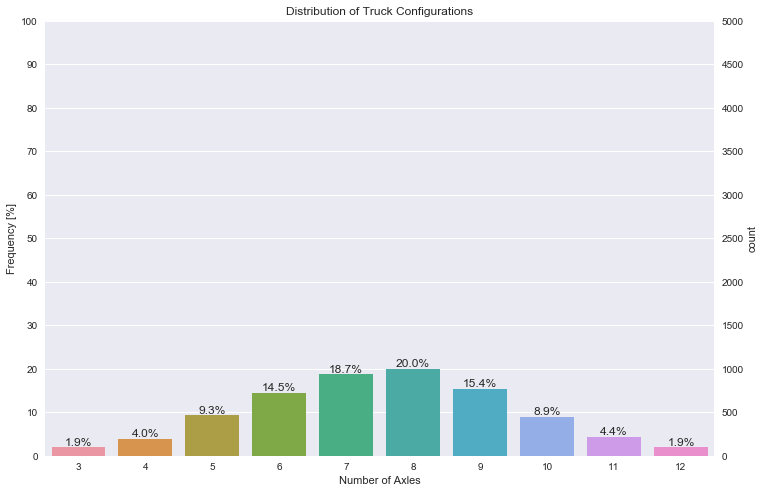

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

# Some random data
dfWIM = pd.DataFrame({'AXLES': np.random.normal(8, 2, 5000).astype(int)})
ncount = len(dfWIM)

plt.figure(figsize=(12,8))
ax = sns.countplot(x="AXLES", data=dfWIM, order=[3,4,5,6,7,8,9,10,11,12])
plt.title('Distribution of Truck Configurations')
plt.xlabel('Number of Axles')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    print(p.get_bbox().get_points())
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

plt.savefig('snscounter.pdf')
plt.show()